In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = np.load('../data/processed/X_train.npy')
X_val = np.load('../data/processed/X_val.npy' )
y_train = np.load('../data/processed/y_train.npy' )
y_val = np.load('../data/processed/y_val.npy', )
X_test = np.load('../data/processed/X_test.npy')

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=44)

In [5]:
#Save model in the models folder
from joblib import dump
dump(rf_model, '../models/random_forest_default.joblib')

['../models/random_forest_default.joblib']

In [6]:
y_trainpreds = rf_model.predict(X_train)
y_val_preds = rf_model.predict(X_val)

In [7]:
#Get error/score metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [8]:
print(mse(y_val, y_val_preds, squared=False))
print(mae(y_val, y_val_preds))

0.41608292442733097
0.173125


In [9]:
rf_model.score(X_train, y_train)

1.0

In [10]:
rf_model.score(X_val, y_val)

0.826875

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

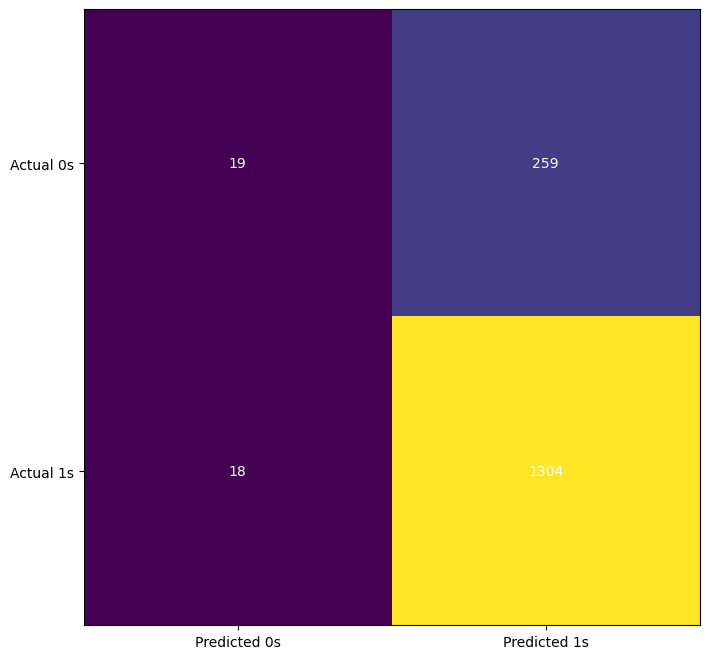

In [12]:
cm = confusion_matrix(y_val, y_val_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()